# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import os
import sys

# Import API key
path = os.path.dirname(os.path.realpath("Users/Work/Desktop/api_keys.py"))
sys.path.append(path)
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_data = []

for city in cities:
    # Requests city data
    url = "https://api.openweathermap.org/data/2.5/weather?q=%s&appid=%s&units=imperial" % (city, weather_api_key)
    response = requests.get(url)
    loaded_data = json.loads(response.text)
    
    # Loads city data with successful response
    if response.status_code == 200:
        print("Loading data for city #%s %s" % (cities.index(city), city))
        data = [
            city,
            loaded_data['clouds']['all'],
            loaded_data['sys']['country'],
            loaded_data['dt'],
            loaded_data['main']['humidity'],
            loaded_data['coord']['lat'],
            loaded_data['coord']['lon'],
            loaded_data['main']['temp_max'],
            loaded_data['wind']['speed']
        ]
        city_data.append(data)
    else:
        print("Could not find city.")

print("____________________________________________")
print(f"Finished loading weather data for {len(city_data)} cities.")

Loading data for city #0 ushuaia
Loading data for city #1 jamestown
Loading data for city #2 katsuura
Loading data for city #3 vaini
Loading data for city #4 bluff
Loading data for city #5 ortakoy
Loading data for city #6 sitka
Loading data for city #7 port elizabeth
Loading data for city #8 busselton
Loading data for city #9 belaya gora
Loading data for city #10 grindavik
Loading data for city #11 rikitea
Loading data for city #12 pacific grove
Loading data for city #13 atuona
Loading data for city #14 hobart
Loading data for city #15 vilhena
Could not find city.
Loading data for city #17 barrow
Loading data for city #18 victoria
Loading data for city #19 san patricio
Loading data for city #20 nejdek
Loading data for city #21 cape town
Loading data for city #22 albany
Loading data for city #23 muros
Loading data for city #24 nikolskoye
Loading data for city #25 lebu
Loading data for city #26 nanortalik
Could not find city.
Loading data for city #28 saint george
Loading data for city #

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating data frame with city weather data
city_dataframe = pd.DataFrame(data=city_data, columns=['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lon', 'Max Temp', 'Wind Speed'])

# Outputing data frame to csv file
city_dataframe.to_csv(output_data_file)

city_dataframe.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,ushuaia,20,AR,1633609957,60,-54.8000,-68.3000,40.62,9.22
1,jamestown,90,US,1633609741,100,42.0970,-79.2353,63.72,5.75
2,katsuura,84,JP,1633609958,81,35.1333,140.3000,74.10,15.23
3,vaini,90,TO,1633609959,100,-21.2000,-175.2000,73.56,4.61
4,bluff,80,NZ,1633609959,81,-46.6000,168.3333,49.80,8.19


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

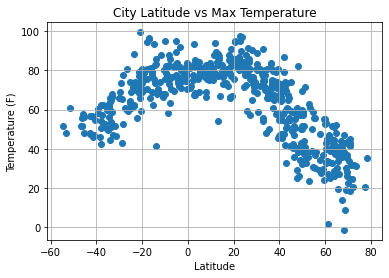

In [15]:
# Plotting data points
plt.scatter(city_dataframe['Lat'], city_dataframe['Max Temp'])

# Labeling Plot
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()

# Saving Plot
plt.savefig('figures/LatitudeVsTemperature.png')

plt.show()

#### Latitude vs. Humidity Plot

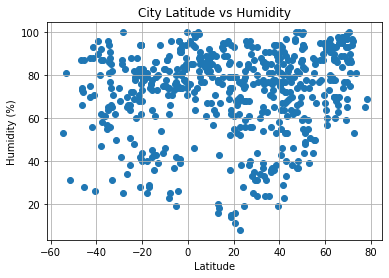

In [16]:
# Plotting data points
plt.scatter(city_dataframe['Lat'], city_dataframe['Humidity'])

# Labeling Plot
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Saving Plot
plt.savefig('figures/LatitudeVsHumidity.png')

plt.show()

#### Latitude vs. Cloudiness Plot

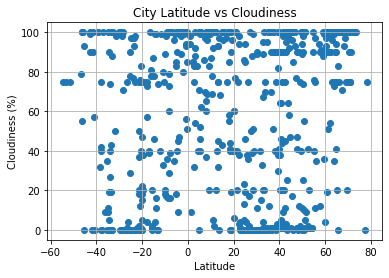

In [17]:
# Plotting data points
plt.scatter(city_dataframe['Lat'], city_dataframe['Cloudiness'])

# Labeling Plot
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Saving Plot
plt.savefig('figures/LatitudeVsCloudiness.png')

plt.show()

#### Latitude vs. Wind Speed Plot

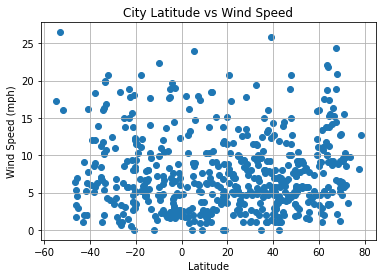

In [18]:
# Plotting data points
plt.scatter(city_dataframe['Lat'], city_dataframe['Wind Speed'])

# Labeling Plot
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

# Saving Plot
plt.savefig('figures/LatitudeVsWindSpeed.png')

plt.show()

## Linear Regression

In [6]:
# OPTIONAL: Create a function to create Linear Regression plots
def auto_reg(x, y, x_label, y_label):
    res = linregress(x, y)
    print(f"R-squared: {res.rvalue**2:.6f}")
    plt.plot(x, y, 'o')
    plt.plot(x, res.slope*x + res.intercept, 'r', label=f'y = {res.slope:.2f}x + {res.intercept:.2f}')
    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [7]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = city_dataframe[city_dataframe.Lat > 0]
southern_hemisphere = city_dataframe[city_dataframe.Lat < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared: 0.716193


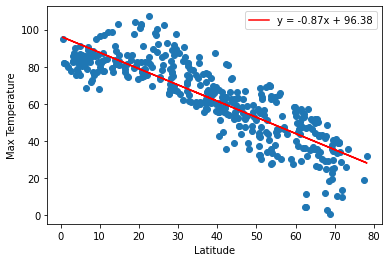

In [9]:
auto_reg(northern_hemisphere['Lat'], northern_hemisphere['Max Temp'], 'Latitude', 'Max Temperature')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared: 0.566516


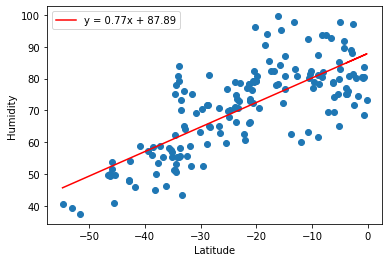

In [11]:
auto_reg(southern_hemisphere['Lat'], southern_hemisphere['Max Temp'], 'Latitude', 'Max Temperature')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared: 0.043927


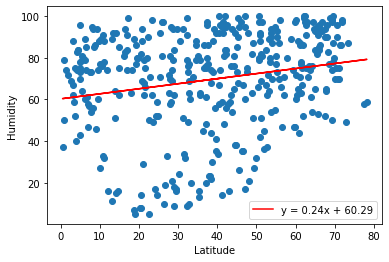

In [12]:
auto_reg(northern_hemisphere['Lat'], northern_hemisphere['Humidity'], 'Latitude', 'Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared: 0.000464


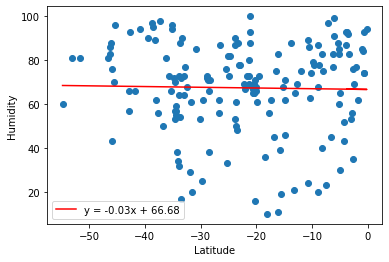

In [13]:
auto_reg(southern_hemisphere['Lat'], southern_hemisphere['Humidity'], 'Latitude', 'Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared: 0.023506


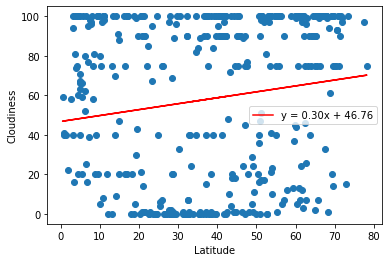

In [14]:
auto_reg(northern_hemisphere['Lat'], northern_hemisphere['Cloudiness'], 'Latitude', 'Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared: 0.001567


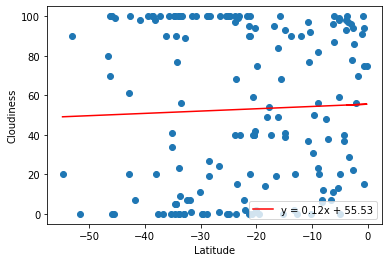

In [16]:
auto_reg(southern_hemisphere['Lat'], southern_hemisphere['Cloudiness'], 'Latitude', 'Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared: 0.044800


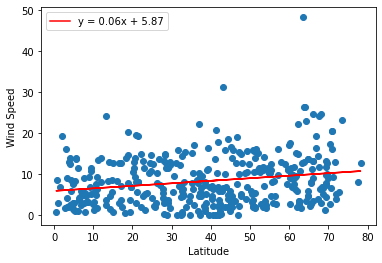

In [15]:
auto_reg(northern_hemisphere['Lat'], northern_hemisphere['Wind Speed'], 'Latitude', 'Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared: 0.009034


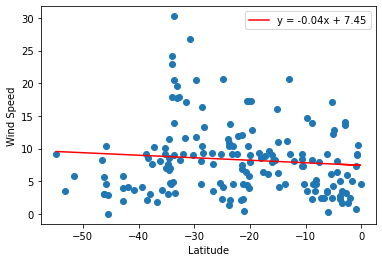

In [17]:
auto_reg(southern_hemisphere['Lat'], southern_hemisphere['Wind Speed'], 'Latitude', 'Wind Speed')